# Standard Option 2: Train/Test split
Note:
Make sure you randomly split the data!
Answer the following questions:
When checking the "accuracy" of your model on the test data, what are some ways you can calculate it for Linear Regression? What about Logistic Regression?
How does changing the percentage of data you leave for testing affect your measurement of accuracy?
Make a plot of (X Axis) Percent Of Data in Testing versus (Y Axis) Accuracy and evaluate the graph. Does it level off anywhere? What does this graph tell you?



In [57]:
import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import pandas as pd

##################################### LINEAR REGRESSION #####################################

def sqr_error(data, m, b):
    error = sum((m*data['x']+b - data['y'])**2)/data.size
    return error

def fit_line(data):
    m = 1
    b = 0
    iterate = 500
    step = 0.05
    for i in range(0, iterate-1):
        min_sqr_error = 10000
        min_m = 10000
        min_b = 0
        for j in range(0,8):
            if j == 0:
                m1 = m+step
                b1 = b+step
            if j == 1:
                m1 = m+step
                b1 = b
            if j == 2:
                m1 = m+step
                b1 = b-step
            if j == 3:
                m1 = m
                b1 = b+step
            if j == 4:
                m1 = m
                b1 = b
            if j == 5:
                m1 = m
                b1 = b-step
            if j == 6:
                m1 = m-step
                b1 = b+step
            if j == 7:
                m1 = m-step
                b1 = b
            if j == 8:
                m1 = m-step
                b1 = b-step
            test_error = sqr_error(data, m1, b1)
            if test_error < min_sqr_error:
                min_sqr_error = test_error
                min_m = m1
                min_b = b1
        m = min_m
        b = min_b
    return m, b

MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))
data = pd.DataFrame(data=x1, columns=['x'])
data['y'] = 0.3 * data['x'] + 1
noise = numpy.random.normal(size=NUM_INPUTS)
data['y'] = data['y'] + noise

def train_test(train_percent, data, num_inputs):
    amount_train = int(num_inputs*train_percent)
    train_data = data.sample(n=amount_train)
    test_data = data.drop(train_data.index)
    train_m,train_b = fit_line(train_data)
    return sqr_error(test_data, train_m, train_b)

train_test(0.9, data, NUM_INPUTS)

0.5603796057794472

Answer the following questions:
When checking the "accuracy" of your model on the test data, what are some ways you can calculate it for Linear Regression? What about Logistic Regression?

For Linear Regression, I used the square error to calculate error. If you were to make it into more of a multinomial regression, you could then use lasso or ridge to make sure it's not overfitting. For logistic regression, as we talked about in class, I could use the precision recall curve and find the area underneath the curve. 

How does changing the percentage of data you leave for testing affect your measurement of accuracy?

By increasing the percentage of training data, your accuracy goes up.

Make a plot of (X Axis) Percent Of Data in Testing versus (Y Axis) Accuracy and evaluate the graph. Does it level off anywhere? What does this graph tell you?

1.0   0.206296559766497
2.979591836734694   0.039728078718436644
4.959183673469388   1.4148446774413148
6.938775510204081   0.5247151970606423
8.918367346938776   0.5900167357817456
10.89795918367347   0.4604856461220021
12.877551020408163   1.0551982031431355
14.857142857142858   0.6122084517844189
16.836734693877553   0.32533017942641695
18.816326530612244   0.34615803031987324
20.79591836734694   0.6307899766424502
22.775510204081634   0.3711869793292233
24.755102040816325   0.43540561261853594
26.73469387755102   0.7931107370788713
28.714285714285715   0.45172477118287446
30.693877551020407   0.6426144597933909
32.673469387755105   0.6790790905516348
34.6530612244898   0.6770278574268342
36.63265306122449   0.5960621479269389
38.61224489795919   0.4457979373942641
40.59183673469388   0.6357201157554921
42.57142857142857   0.5996290048247063
44.55102040816327   0.4609197305398286
46.53061224489796   0.6244304620232722
48.51020408163265   0.5192447413388316
50.48979591836735   0.4449

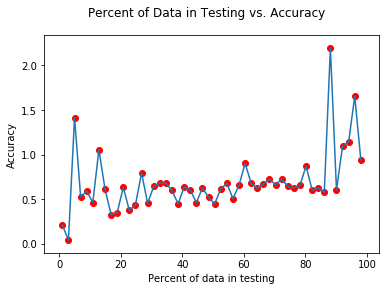

In [58]:
xVals = numpy.linspace(1, 98)

fig = matplotlib.pyplot.figure(1)
fig.suptitle('Percent of Data in Testing vs. Accuracy')
matplotlib.pyplot.xlabel('Percent of data in testing')
matplotlib.pyplot.ylabel('Accuracy')

yVals = []

for item in xVals:
    val = train_test((1-(item/100)), data, NUM_INPUTS)
    print (item, " ", val)
    yVals.append(val)

print(yVals)
matplotlib.pyplot.plot(xVals, yVals)
matplotlib.pyplot.scatter(xVals, yVals, c="red", marker="o")



# Advanced Option 2: Precision-Recall Curve
After building a model, write code that plots a ROC curve OR a Precision-Recall Curve. Don't use the built-in sklearn functions for this.
Also write code that calculates the Area Under the Curve (AUC) to approximate the quality of the model
You can use this function to do so: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html (Links to an external site.)Links to an external site. 
Challenge: You can also try writing a function that approximates the area under the curve yourself.

50 41 0 0.01
50 37 0 0.02
50 34 0 0.03
50 33 0 0.04
50 33 0 0.05
50 32 0 0.06
50 29 0 0.07
50 27 0 0.08
49 26 1 0.09
49 24 1 0.1
49 23 1 0.11
49 22 1 0.12
49 20 1 0.13
49 18 1 0.14
49 16 1 0.15
49 16 1 0.16
49 14 1 0.17
49 14 1 0.18
49 14 1 0.19
49 14 1 0.2
49 14 1 0.21
49 13 1 0.22
49 13 1 0.23
48 13 2 0.24
48 13 2 0.25
48 13 2 0.26
48 13 2 0.27
48 12 2 0.28
48 12 2 0.29
48 11 2 0.3
48 11 2 0.31
48 11 2 0.32
48 11 2 0.33
48 11 2 0.34
48 10 2 0.35
47 10 3 0.36
47 10 3 0.37
46 9 4 0.38
46 9 4 0.39
46 9 4 0.4
46 9 4 0.41
46 9 4 0.42
46 9 4 0.43
46 8 4 0.44
46 8 4 0.45
46 8 4 0.46
46 7 4 0.47
46 7 4 0.48
46 7 4 0.49
46 6 4 0.5
45 6 5 0.51
45 6 5 0.52
45 6 5 0.53
45 6 5 0.54
45 6 5 0.55
44 6 6 0.56
44 5 6 0.57
43 4 7 0.58
43 4 7 0.59
42 4 8 0.6
41 4 9 0.61
41 4 9 0.62
41 4 9 0.63
41 4 9 0.64
39 4 11 0.65
37 3 13 0.66
37 3 13 0.67
37 3 13 0.68
37 3 13 0.69
37 3 13 0.7
37 3 13 0.71
36 3 14 0.72
36 3 14 0.73
36 3 14 0.74
35 3 15 0.75
35 3 15 0.76
35 3 15 0.77
35 3 15 0.78
35 3 15 0.79
34 3 16

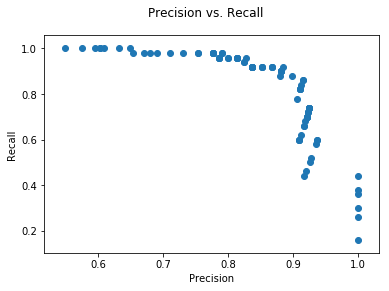

In [56]:
################################################################################
#  GENERATED DATA
################################################################################

# We have two types of plants
# Plant A tends to be taller (avg 60cm) and thinner (avg 8cm)
# Plant B tends to be shorter (avg 58cm) and wider (avg 10cm)
# We'll use 0 for Plant A and 1 for Plant B

NUM_INPUTS = 50
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0

plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plant_inputs = list(zip(numpy.append(plantA_heights, plantB_heights), numpy.append(plantA_widths, plantB_widths)))
        
types = [0]*NUM_INPUTS + [1]*NUM_INPUTS

model = linear_model.LogisticRegression()
model.fit(plant_inputs, types)

plantA_test_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=50)
plantA_test_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=50)
plantB_test_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=50)
plantB_test_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=50)


plant_inputs_test_A = list(zip(plantA_test_heights, plantA_test_widths))
plant_inputs_test_B = list(zip(plantB_test_heights, plantB_test_widths))

thresholds = []
for i in range(1, 100):
    thresholds.append(i/100)
    
precision = []
recall = []
    
for threshold in thresholds:
    TP = 0
    FP = 0
    FN = 0
    a_prob = model.predict_proba(plant_inputs_test_A)
    b_prob = model.predict_proba(plant_inputs_test_B)
    for i in a_prob:
        if i[0] > threshold:
            TP += 1
        elif i[0] < threshold:
            FN += 1
    for l in b_prob:
        if l[0] > threshold:
            FP += 1
    print(TP, FP, FN, threshold)
            
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    precision.append(p)
    recall.append(r)

print(precision)
print(recall)

#print(model.predict(plant_inputs_test_B))
    
fig = matplotlib.pyplot.figure(1)
fig.suptitle('Precision vs. Recall')
matplotlib.pyplot.xlabel('Precision')
matplotlib.pyplot.ylabel('Recall')

matplotlib.pyplot.scatter(precision, recall)
    
## PRECISION: TP/TP+FP
## RECALL: TP/TP+FN